In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Understanding the columns better

In [7]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


## Checking correlation between columns

In [9]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## Exploratory Data Analysis (EDA)

target
1    165
0    138
Name: count, dtype: int64


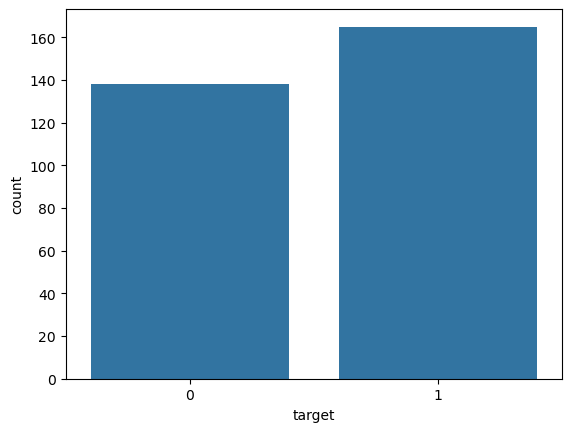

In [10]:
sns.countplot(x='target', data=data)

target_temp = data.target.value_counts()

print(target_temp)

In [11]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyze 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

#### Analyzing sex column


In [12]:
data['sex'].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

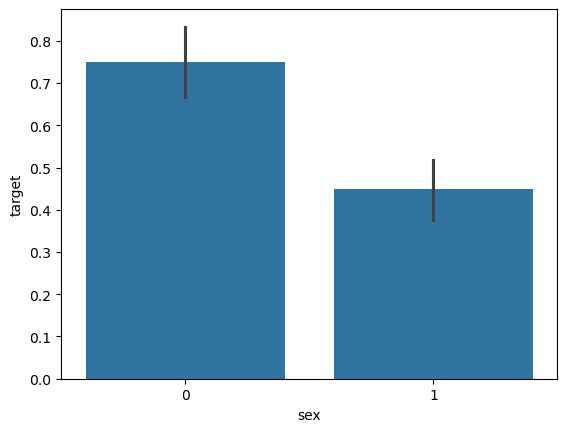

In [13]:
sns.barplot(x=data['sex'], y=data['target'])

#### Females are likely to have more heart problems than men

#### Analyzing cp

In [14]:
data['cp'].unique()

array([3, 2, 1, 0])

<Axes: xlabel='cp', ylabel='target'>

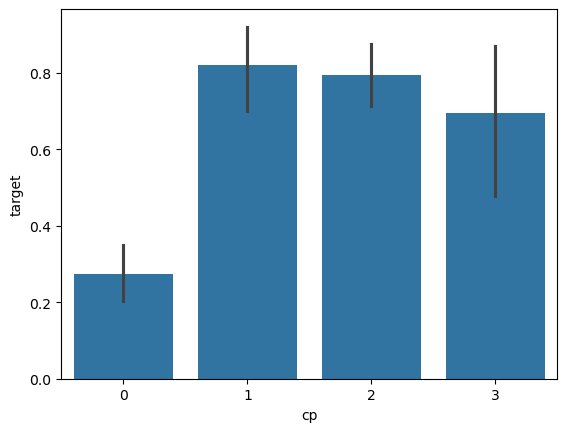

In [15]:
sns.barplot(x=data['cp'], y=data['target'])

#### We can see that chest pain type 0 i.e. typical angina is less likely to led to heart problems

#### Analyzing fbs

In [16]:
data['fbs'].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

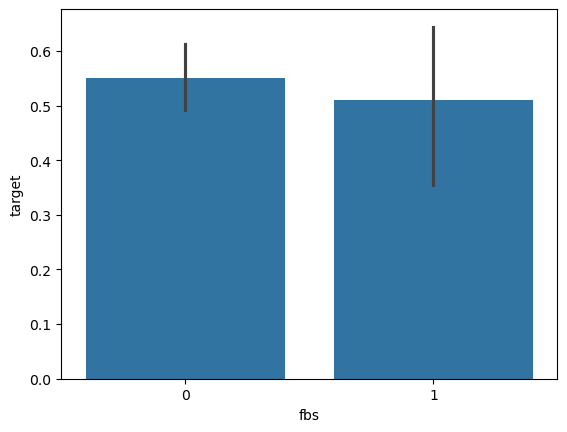

In [17]:
sns.barplot(x=data['fbs'], y=data['target'])

#### Analyzing restecg

In [18]:
data['restecg'].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

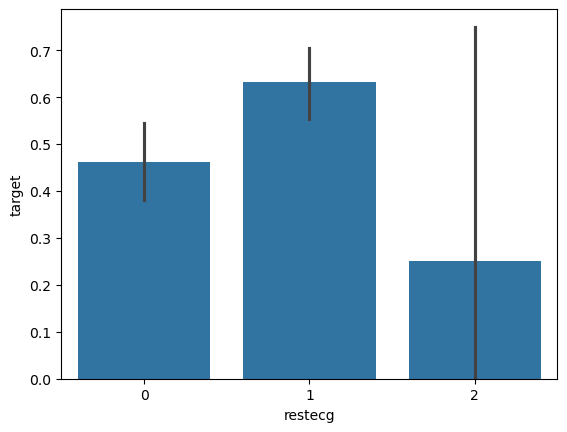

In [19]:
sns.barplot(x=data['restecg'], y=data['target'])

#### We can see that restecg value 2 is less likely to have heart problems

#### Analyzing exang

In [20]:
data['exang'].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

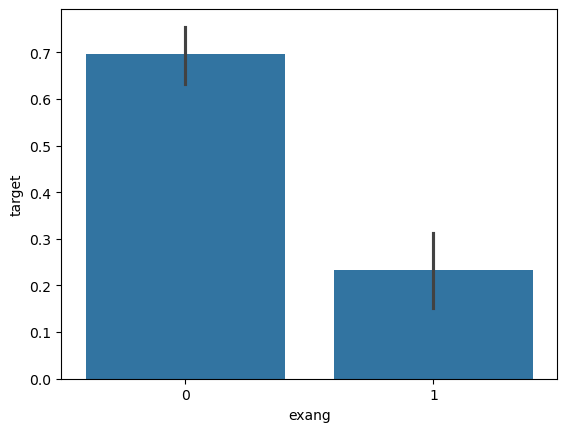

In [21]:
sns.barplot(x=data['exang'], y=data['target'])

#### People with exercise enigna 1 is less likely to have heart problems

#### Analyzing slope

In [22]:
data['slope'].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

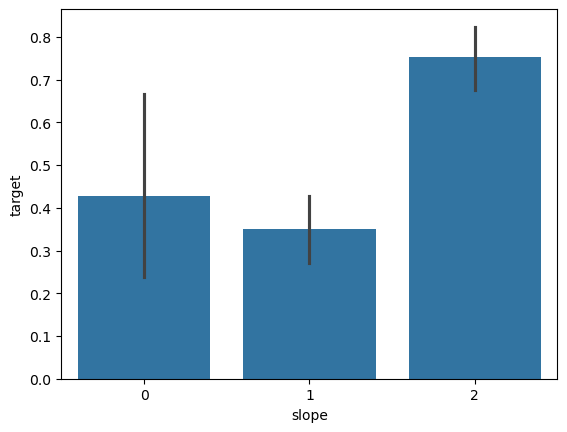

In [23]:
sns.barplot(x=data['slope'], y=data['target'])

#### Slope 2 causes more heart problems

#### Analyzing ca

In [24]:
data['ca'].unique()

array([0, 2, 1, 3, 4])

<Axes: xlabel='ca', ylabel='target'>

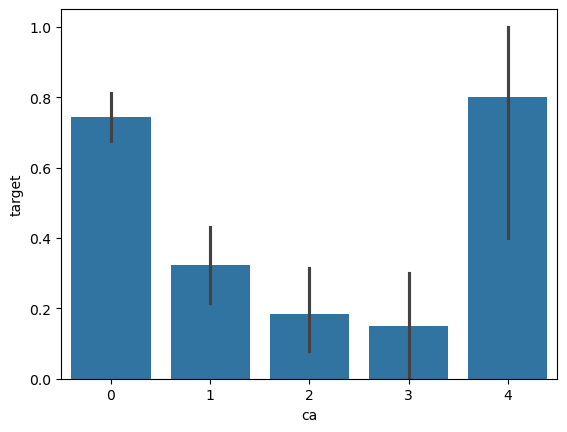

In [25]:
sns.barplot(x=data['ca'], y=data['target'])

##### ca=4 has astonishingly large number of heart patients

#### Analyzing thal

In [26]:
data['thal'].unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

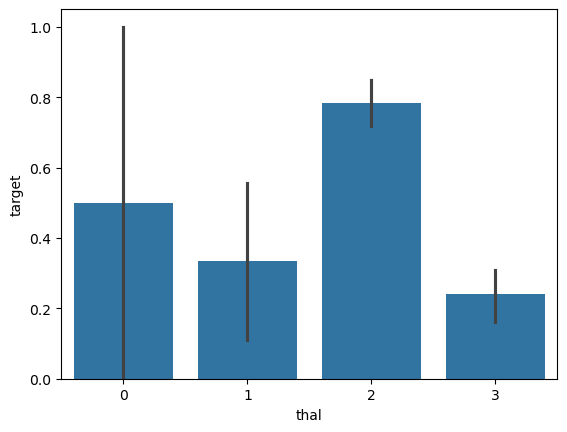

In [27]:
sns.barplot(x=data['thal'], y=data['target'])

## Splitting data

In [28]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1:].values

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=67)

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242, 1)
(61, 1)


### Normaliztion

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
x_train = sc.fit_transform(x_train)


In [33]:
x_test = sc.transform(x_test)


## Training models

### logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [35]:
lr.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [37]:
from sklearn.metrics import classification_report, accuracy_score

In [38]:
lr_cr = classification_report(y_test, y_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.93      0.69      0.79        36
           1       0.68      0.92      0.78        25

    accuracy                           0.79        61
   macro avg       0.80      0.81      0.79        61
weighted avg       0.82      0.79      0.79        61



In [39]:
lr_accuracy = accuracy_score(y_test, y_pred)
lr_accuracy

0.7868852459016393

### KNN Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [43]:
knn_cr = classification_report(y_test, y_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.96      0.64      0.77        36
           1       0.65      0.96      0.77        25

    accuracy                           0.77        61
   macro avg       0.80      0.80      0.77        61
weighted avg       0.83      0.77      0.77        61



In [44]:
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy

0.7704918032786885

### Kernel SVM

In [45]:
from sklearn.svm import SVC

In [46]:
svm = SVC(kernel='rbf', random_state=32)

In [47]:
svm.fit(x_train, y_train)

SVC(random_state=32)

In [48]:
y_pred = svm.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [49]:
svm_cr = classification_report(y_test, y_pred)
print(svm_cr)

              precision    recall  f1-score   support

           0       0.96      0.61      0.75        36
           1       0.63      0.96      0.76        25

    accuracy                           0.75        61
   macro avg       0.79      0.79      0.75        61
weighted avg       0.82      0.75      0.75        61



In [50]:
svm_accuracy = accuracy_score(y_test, y_pred)
svm_accuracy

0.7540983606557377

### Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [52]:
nb.fit(x_train, y_train)

GaussianNB()

In [53]:
y_pred = nb.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

In [54]:
nb_cr = classification_report(y_test, y_pred)
print(nb_cr)

              precision    recall  f1-score   support

           0       0.89      0.69      0.78        36
           1       0.67      0.88      0.76        25

    accuracy                           0.77        61
   macro avg       0.78      0.79      0.77        61
weighted avg       0.80      0.77      0.77        61



In [55]:
nb_accuracy = accuracy_score(y_test, y_pred)
nb_accuracy

0.7704918032786885

### Decision Tree Model

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [57]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [58]:
dt_cr = classification_report(y_test, y_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.85      0.61      0.71        36
           1       0.60      0.84      0.70        25

    accuracy                           0.70        61
   macro avg       0.72      0.73      0.70        61
weighted avg       0.75      0.70      0.71        61



In [59]:
dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.7049180327868853

### Random forest model

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='entropy')

In [61]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [62]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [63]:
rf_cr = classification_report(y_test, y_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.96      0.67      0.79        36
           1       0.67      0.96      0.79        25

    accuracy                           0.79        61
   macro avg       0.81      0.81      0.79        61
weighted avg       0.84      0.79      0.79        61



In [64]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy

0.7868852459016393

In [65]:
print(f"Logistic Regression: {lr_accuracy * 100:.2f}")
print(f"KNN Model          : {knn_accuracy * 100:.2f}")
print(f"SVM Model          : {svm_accuracy * 100:.2f}")
print(f"Naive Bayes        : {nb_accuracy * 100:.2f}")
print(f"Decision Tree      : {dt_accuracy * 100:.2f}")
print(f"Random Forest      : {rf_accuracy * 100:.2f}")

Logistic Regression: 78.69
KNN Model          : 77.05
SVM Model          : 75.41
Naive Bayes        : 77.05
Decision Tree      : 70.49
Random Forest      : 78.69


**Logistic regression has the Highest accuracy therefore we select that model**

### Applying k-Fold Cross Validation on LR model

In [66]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.80 %
Standard Deviation: 9.37 %


In [67]:
import pickle

In [68]:
with open('heart_model', 'wb') as file:
    pickle.dump(lr, file)

In [69]:
with open('heart_scaler', 'wb') as file:
    pickle.dump(sc,file)